<a href="https://colab.research.google.com/github/KodumuruRaja/Regression-Algorithms/blob/main/Locally-Weighted-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

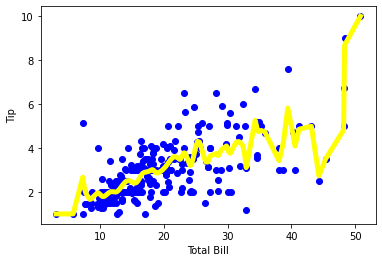

In [ ]:
# Gaussian kernel
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights
def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred
df=sns.load_dataset('tips')
x=np.array(df.total_bill)
y=np.array(df.tip)
mcolA=np.mat(x)
mcolB=np.mat(y)
m=np.shape(mcolB)[1]
one=np.ones((1,m),dtype=int)
# horizontal stacking
X=np.hstack((one.T,mcolA.T))
X.shape
y_pred=localWeightRegression(X,mcolB,0.5)
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(x,y, color='blue')
plt.plot(xsort[:, 1], y_pred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()